# Part 2: Stochastic Gradient Descent, Momentum, and Adam

### For this part of the lab, using the same data and setup as in Part 1, compare how stochastic gradient descent (SGD), SGD with momentum, and ADAM will perform. You are free to write all of the code on your own, or if you prefer, you can fill in the missing sections in the code below.

### Start by reusing some of the functions you have coded for Part 1 to compute the hypothesis, the gradient of the cost function, and the cost function. This code will then be used by the next section of the workbook.

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## generate M data points roughly forming a line (noise added)
M = 50
theta_true = torch.Tensor([[0.5], [2]])

X = 10 * torch.rand(M, 2) - 5
X[:, 1] = 1.0

y = torch.mm(X, theta_true) + 0.3 * torch.randn(M, 1)

## hypothesis computes $h_theta$
def hypothesis(theta, X):
    # YOUR CODE HERE
    #raise NotImplementedError()
    #My code
    y_predict = torch.mm(X, theta)
    return y_predict

## grad_cost_func computes the gradient of J for linear regression given J is the MSE 
def grad_cost_func(theta, X, y): 
    # YOUR CODE HERE
    #raise NotImplementedError()
    #My code
    loss_MSE = cost_func(theta, X, y)
    M = X.shape[0]
    grad = (1 / M) * torch.mm(X.t(), torch.mm(X, theta) - y)
    return grad
    
## cost_func computes
def cost_func(theta, X, y):
    # YOUR CODE HERE
    #raise NotImplementedError()
    loss_SE = (hypothesis(theta, X) - y).t() @ (hypothesis(theta, X) - y)
    M = X.shape[0]
    loss_MSE = (1 / (2 * M)) * loss_SE
    return loss_MSE
  


## Now we'd like to compare how stochastic gradient descent (SGD), SGD with momentum, and ADAM will run over weight updates. Complete the defined functions below and make sure to add the parameters which may need to be passed into the functions as well. Plot the weight updates over the contour plot using varying colours. Note, for clarity, you may only want to plot some of the updates.

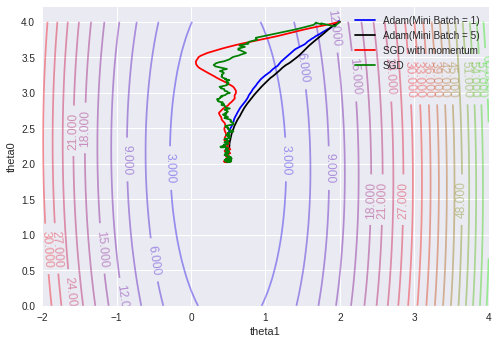

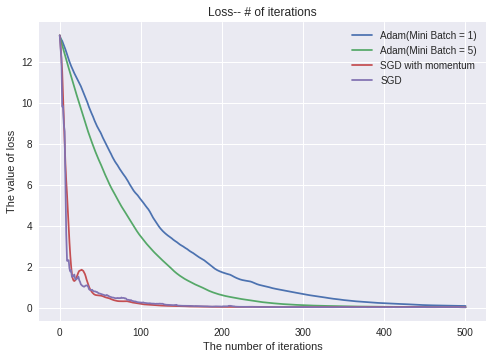

In [0]:
## The weight update computed using the ADAM optimisation algorithm
def weightupdate_adam(X, y, theta_initial, rate, M, numepochs, beta1, beta2):
    # YOUR CODE HERE
    #raise NotImplementedError()
    #My code
    Vdw_last = torch.zeros(2,1)
    Sdw_last = torch.zeros(2,1)
    m, n = X.shape
    theta_all = torch.zeros(2, numepochs+1)
    J_all = torch.zeros(1,numepochs+1)
    theta = theta_initial
    theta_all[:, 0] = theta.squeeze()
    J = cost_func(theta, X, y)
    J_all[:, 0] = J.squeeze()
    
    for i in range(numepochs):
      grad = torch.zeros(2, 1)
      X_MINI = torch.zeros(M, 2)
      y_MINI = torch.zeros(M, 1)
      for j in range(M):
        idx = np.random.randint(0, m - 1)
        
        X_mini = X[idx: idx+1]
        y_mini = y[idx: idx+1]
        X_MINI[j, :] = X_mini
        y_MINI[j] = y_mini
        
      grad = grad_cost_func(theta, X_MINI, y_MINI)
        
      
      Vdw = beta1 * Vdw_last + (1 - beta1) * grad
      Sdw = beta2 * Sdw_last + (1 - beta2) * (grad**2)
        
      Vdw_corr = Vdw / (1 - beta1**(i+1))
      Sdw_corr = Sdw / (1 - beta2**(i+1))
      
      
      theta = theta - rate * (Vdw_corr / torch.sqrt(Sdw_corr) + 0.00000001)
        
      Vdw_last = Vdw
      Sdw_last = Sdw
       
      theta_all[:,i+1] = theta.squeeze()
      J = cost_func(theta, X, y)
      J_all[:, i+1] = J.squeeze()
    return theta_all, J_all
    
    
## The weight update computed using SGD + momentum
def weightupdate_sgd_momentum(X, y, theta_initial, rate, numepochs, beta):
    # YOUR CODE HERE
    #raise NotImplementedError()
    #My ocde
    m, n = X.shape
    theta_all = torch.zeros(2, numepochs+1)
    J_all = torch.zeros(1,numepochs+1)
    theta = theta_initial
    theta_all[:, 0] = theta.squeeze()
    J = cost_func(theta, X, y)
    J_all[:, 0] = J.squeeze()
    Vt_last = torch.zeros(2, 1)
    
    for i in range(numepochs):
      idx = np.random.randint(m)
      X_onesamp = X[idx, :].reshape(1,-1)
      y_onesamp = y[idx]
      grad = grad_cost_func(theta, X_onesamp, y_onesamp)
      Vt = beta * Vt_last + (1 - beta) * grad
      theta = theta - rate * Vt
      Vt_last = Vt
      theta_all[:,i+1] = theta.squeeze()
      J = cost_func(theta, X, y)
      J_all[:, i+1] = J.squeeze()
    return theta_all, J_all
      
    
## The weight updated computed using SGD
def weigthupdate_sgd(X, y, theta_initial, rate, numepochs):
    # YOUR CODE HERE
    #raise NotImplementedError()
    #My code
    m, n = X.shape
    theta_all = torch.zeros(2, numepochs+1)
    J_all = torch.zeros(1,numepochs+1)
    theta = theta_initial
    theta_all[:, 0] = theta.squeeze()
    J = cost_func(theta, X, y)
    J_all[:,0] = J.squeeze()
    for i in range(numepochs):
      idx = np.random.randint(m)
      X_onesamp = X[idx, :].reshape(1,-1)
      y_onesamp = y[idx]
      grad = grad_cost_func(theta, X_onesamp, y_onesamp)
      theta = theta - rate * grad
      theta_all[:,i+1] = theta.squeeze()
      J = cost_func(theta, X, y)
      J_all[:, i+1] = J.squeeze()
    return theta_all, J_all
    
    
    
N = 500 #change from 200 to 500
beta_1 = 0.9
beta_2 = 0.999
alpha = 0.01

theta_0 = torch.Tensor([[2],[4]]) #initialise

# Write the code that will call of the optimisation update functions and compute weight updates for each individual data point over N iterations.

# YOUR CODE HERE
#raise NotImplementedError()
#My code
mini_batch1 = 1
mini_batch2 = 5
theta_all_adam, J_all_adam = weightupdate_adam(X, y,theta_0, alpha, mini_batch1, N, beta_1, beta_2)
theta_all_adam2, J_all_adam2 = weightupdate_adam(X, y,theta_0, alpha, mini_batch2, N, beta_1, beta_2)
theta_all_sgd_momentum, J_all_sgd_momentum = weightupdate_sgd_momentum(X, y, theta_0, alpha, N, beta_1)
theta_all_sgd, J_all_sgd = weigthupdate_sgd(X, y, theta_0, alpha, N)


theta_0_vals = np.linspace(-2,4,100)
theta_1_vals = np.linspace(0,4,100)
theta = torch.Tensor(len(theta_0_vals),2)

# Compute the value of the cost function, J, over all the thetas in order to plot the contour below.
# YOUR CODE HERE
#raise NotImplementedError()
#My code
J = torch.Tensor(len(theta_0_vals),len(theta_1_vals))
for i in range(len(theta_1_vals)):
  for j in range(len(theta_0_vals)):
    theta_e = torch.tensor([theta_0_vals[j], theta_1_vals[i]])
    J[i,j] = cost_func(theta_e.reshape(2, 1), X, y)



xc,yc = np.meshgrid(theta_0_vals, theta_1_vals)
contours = plt.contour(xc, yc, J, 20, alpha = 0.4, cmap = 'brg')
plt.clabel(contours)

# Now plot the output of SGD, momentum and Adam all on the same plot for comparison
# YOUR CODE HERE
#raise NotImplementedError()
#My code
plt.plot(theta_all_adam[0,:].numpy(), theta_all_adam[1,:].numpy(), c = 'b', label = 'Adam(Mini Batch = 1)')
plt.plot(theta_all_adam2[0,:].numpy(), theta_all_adam2[1,:].numpy(), c = 'k', label = 'Adam(Mini Batch = 5)')
plt.plot(theta_all_sgd_momentum[0,:].numpy(), theta_all_sgd_momentum[1,:].numpy(), c = 'r', label = 'SGD with momentum')
plt.plot(theta_all_sgd[0,:].numpy(), theta_all_sgd[1,:].numpy(), c = 'g', label = 'SGD')
plt.xlabel('theta1')
plt.ylabel('theta0')
plt.legend()


plt.figure()
x = np.linspace(0, N + 1, N + 1)
plt.plot(x, J_all_adam.t().numpy(), label = 'Adam(Mini Batch = 1)')
plt.plot(x, J_all_adam2.t().numpy(), label = 'Adam(Mini Batch = 5)')
plt.plot(x, J_all_sgd_momentum.t().numpy(), label = 'SGD with momentum')
plt.plot(x, J_all_sgd.t().numpy(), label = 'SGD')
plt.xlabel('The number of iterations')
plt.ylabel('The value of loss')
plt.title('Loss-- # of iterations')
plt.legend()



**PS:**

In addition, I plotted the value of loss with respect to the number of iterations.                

From the output picture in the above, we can find that SGD is the fastest way to update weight in this case, while Adam is the worst, but Adam shows the best direction of the update of weight.

I think this probably because the update rate of the method of Adam become smaller and smaller as the number of iterations increased?
